# **TASK 1: Prediction using Supervised ML**
Author: JESICCA NAYAK

Date: 14/08/2021

Dataset: http://bit.ly/w-data


# **Importing Libraries**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# **Reading the data**

In [2]:
s_score = pd.read_csv("http://bit.ly/w-data")
s_score

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# **Data Summary**


In [3]:
# Shape of the data

s_score.shape

(25, 2)

In [4]:
# Checking for null values

s_score.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
# Descriptive statistics of the data

s_score.describe()


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Obsevation from Data Summary
1. Shape of the data is (25,2)
2. There are no null values.


# **Data Visualization**


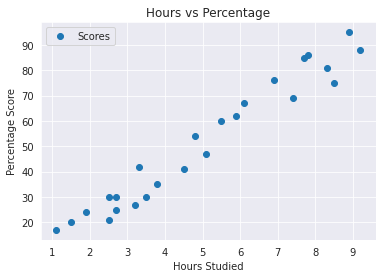

In [6]:
# Scatter plot of Hours vs Percentage

s_score.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')

plt.show()

# **Preparing the Data**

In [7]:
# Extracting values
X = s_score.iloc[:, :-1].values
y = s_score.iloc[:, 1].values

In [8]:
# Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=0)


# **Training the Algorithm**

In [9]:
# Train the model

reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Plotting the Regression Line


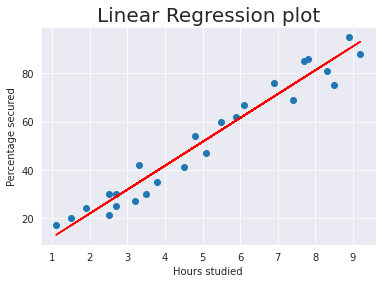

In [10]:
# Plotting the regression line

line = reg_model.coef_*X + reg_model.intercept_

plt.title('Linear Regression plot', size=20)
plt.ylabel('Percentage secured', size=10)
plt.xlabel('Hours studied', size=10)
plt.scatter(X,y)
plt.plot(X, line, color ='red')

plt.show()

# **Testing the Data**

In [11]:
# Predict the scores on test data

y_pred = reg_model.predict(X_test)

In [12]:
# Comparing Actual vs Predicted

pd.DataFrame({'Hours': X_test.flatten(), 'Actual_Score': y_test,'Predicted_Score': y_pred})

,Hours,Actual_Score,Predicted_Score
0,1.5,20,16.884145
1,3.2,27,33.732261
2,7.4,69,75.357018
3,2.5,30,26.794801
4,5.9,62,60.491033


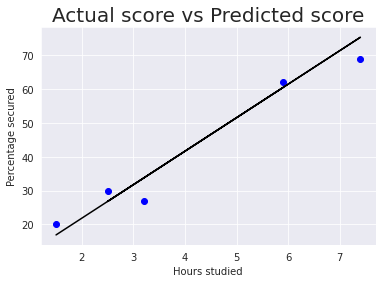

In [13]:
# Plot comparing the predicted values with the actual values

plt.scatter(x=X_test, y=y_test, color='blue')
plt.plot(X_test, y_pred, color='Black')
plt.title('Actual score vs Predicted score', size=20)
plt.ylabel('Percentage secured', size=10)
plt.xlabel('Hours studied', size=10)

plt.show()

**Model Scoring**



In [14]:
# Mean Absolute Error & RMSE

from sklearn import metrics

print('Mean Absolute Error:',
       metrics.mean_absolute_error(y_test, y_pred))

print('RMSE Score:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

print('R Squared value', metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 4.183859899002982
RMSE Score: 4.647447612100373
R Squared value 0.9454906892105354


MAE and RMSE are in the same unit as the output variable. So we can say our model predicts score with Mean Absolute Error 4.18 & RMSE 4.64.

Moreover we have R-Squared value of 0.945, which shows good model performance.


# **Predicted score of a student who studies for 9.25 hrs/day**

In [15]:
# Test score for student who studies 9.25 hours/day

pred = reg_model.predict([[9.25]])
print("If a student studies for 9.25 hours, then the predicted score will be {:.2f} %".format(pred[0]))

If a student studies for 9.25 hours, then the predicted score will be 93.69 %
